In [9]:
import pandas as pd

df = pd.read_csv("Tema1_Metricas_Evaluacion(Datos).csv")
df.head()


,Día,Valor real (Y),Pronóstico A,Pronóstico B,Pronóstico C,AbsErr A,SqErr A,APE A,sAPE A,AbsErr B,SqErr B,APE B,sAPE B,AbsErr C,SqErr C,APE C,sAPE C
0,1,95,92,94,90,3,9.0,0.0316,0.0321,1,1.0,0.0105,0.0106,5,25.0,0.0526,0.0541
1,2,97,93,96,101,4,16.0,0.0412,0.0421,1,1.0,0.0103,0.0104,4,16.0,0.0412,0.0404
2,3,96,98,95,92,2,4.0,0.0208,0.0206,1,1.0,0.0104,0.0105,4,16.0,0.0417,0.0426
3,4,98,94,99,103,4,16.0,0.0408,0.0417,1,1.0,0.0102,0.0102,5,25.0,0.0510,0.0498
4,5,100,96,100,95,4,16.0,0.0400,0.0408,0,0.0,0.0000,0.0000,5,25.0,0.0500,0.0513


In [10]:
df.columns


Index(['Día', 'Valor real (Y)', 'Pronóstico A', 'Pronóstico B', 'Pronóstico C',
       'AbsErr A', 'SqErr A', 'APE A', 'sAPE A', 'AbsErr B', 'SqErr B',
       'APE B', 'sAPE B', 'AbsErr C', 'SqErr C', 'APE C', 'sAPE C'],
      dtype='object')

In [11]:
import numpy as np
import matplotlib.pyplot as plt


In [12]:
def mae(y, y_hat):
    return np.mean(np.abs(y - y_hat))

def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

def rmse(y, y_hat):
    return np.sqrt(mse(y, y_hat))

def mape(y, y_hat):
    return np.mean(np.abs((y - y_hat) / y))

def smape(y, y_hat):
    return np.mean(np.abs(y - y_hat) / ((np.abs(y) + np.abs(y_hat)) / 2))


In [13]:
y  = df["Valor real (Y)"].values
yA = df["Pronóstico A"].values
yB = df["Pronóstico B"].values
yC = df["Pronóstico C"].values


In [14]:
def print_metrics(nombre, y_hat):
    print(nombre)
    print("MAE:", round(mae(y, y_hat), 4))
    print("MSE:", round(mse(y, y_hat), 4))
    print("RMSE:", round(rmse(y, y_hat), 4))
    print("MAPE (%):", round(mape(y, y_hat)*100, 2))
    print("sMAPE (%):", round(smape(y, y_hat)*100, 2))
    print()

print_metrics("Modelo A", yA)
print_metrics("Modelo B", yB)
print_metrics("Modelo C", yC)


Modelo A
MAE: 3.5
MSE: 13.0
RMSE: 3.6056
MAPE (%): 3.33
sMAPE (%): 3.36

Modelo B
MAE: 0.75
MSE: 0.75
RMSE: 0.866
MAPE (%): 0.72
sMAPE (%): 0.72

Modelo C
MAE: 5.4
MSE: 29.7
RMSE: 5.4498
MAPE (%): 5.11
sMAPE (%): 5.13



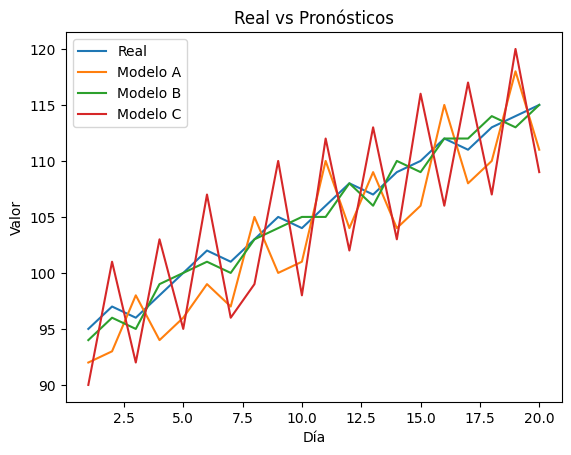

In [15]:
plt.figure()
plt.plot(df["Día"], df["Valor real (Y)"], label="Real")
plt.plot(df["Día"], df["Pronóstico A"], label="Modelo A")
plt.plot(df["Día"], df["Pronóstico B"], label="Modelo B")
plt.plot(df["Día"], df["Pronóstico C"], label="Modelo C")
plt.xlabel("Día")
plt.ylabel("Valor")
plt.title("Real vs Pronósticos")
plt.legend()
plt.show()
